In [0]:
from google.colab import drive
drive.mount('/content/drive')


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT,IMG_WIDTH,3))
output = restnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
restnet = Model(restnet.input, outputs = output)
for layer in restnet.layers:
    layer.trainable = True
restnet.summary() 



94773248/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model =  Sequential()
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
model.add(restnet)

model.add(Dense(1024, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 100352)            23587712  
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 126,876,549
Trainable params: 126,823,429
Non-trainable params: 53,120
_____________________________________

In [8]:
#from tensorflow.keras.applications.resnet50 import preprocess_input
batch_size = 128
epochs = 30
num_classes = 5
X_train_norm = preprocess_input(X_train)
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 

Epoch 1/30
19/19 [==============================] - 198s 10s/step - loss: 1.7667 - accuracy: 0.6167 - val_loss: 0.8266 - val_accuracy: 0.6381
Epoch 2/30
19/19 [==============================] - 195s 10s/step - loss: 0.5397 - accuracy: 0.8157 - val_loss: 0.7676 - val_accuracy: 0.6226
Epoch 3/30
19/19 [==============================] - 198s 10s/step - loss: 0.2947 - accuracy: 0.8899 - val_loss: 0.8829 - val_accuracy: 0.6615
Epoch 4/30
19/19 [==============================] - 197s 10s/step - loss: 0.2294 - accuracy: 0.9324 - val_loss: 0.7914 - val_accuracy: 0.6732
Epoch 5/30
19/19 [==============================] - 198s 10s/step - loss: 0.1272 - accuracy: 0.9623 - val_loss: 0.8800 - val_accuracy: 0.7315
Epoch 6/30
19/19 [==============================] - 198s 10s/step - loss: 0.0733 - accuracy: 0.9788 - val_loss: 0.6735 - val_accuracy: 0.7588
Epoch 7/30
19/19 [==============================] - 198s 10s/step - loss: 0.2319 - accuracy: 0.9796 - val_loss: 0.7560 - val_accuracy: 0.7743
Epoch 

In [9]:
X_test_norm = preprocess_input(X_test)
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 2.0362656116485596
Test accuracy: 0.7725204825401306


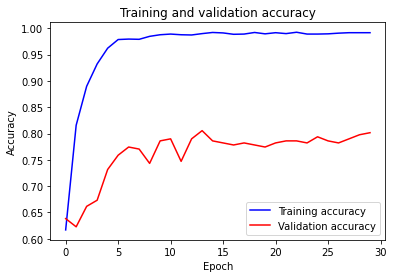

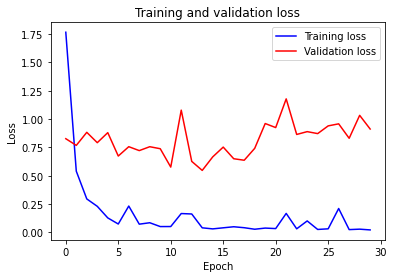

In [10]:
accuracy = eyetest_train.history['accuracy']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_accuracy']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
def decode(datum):
    return np.argmax(datum)
    

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [0]:
compare = np.column_stack((y_test_decoded, y_pred_decoded))

In [16]:
from sklearn.metrics import classification_report
#multilabel_confusion_matrix(y_test_decoded, y_pred_decoded)
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.92      0.94      0.93       540
            Mild       0.42      0.18      0.26        98
        Moderate       0.54      0.88      0.67       302
          Severe       0.40      0.07      0.12        55
Proliferative DR       0.00      0.00      0.00       104

        accuracy                           0.72      1099
       macro avg       0.45      0.42      0.40      1099
    weighted avg       0.66      0.72      0.67      1099



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_decoded, y_pred_decoded, labels= [0,1,2,3,4]))

[[509   4  27   0   0]
 [ 18  18  62   0   0]
 [ 21  15 265   1   0]
 [  2   0  49   4   0]
 [  6   6  87   5   0]]
